# Exemplo de Segmentação por Watershed


A técnica de watershed para segmentação de imagens é baseada na topografia da imagem e, para obter bons resultados, é normalmente necessário definir marcadores (sementes) para guiar a segmentação. Esta é uma técnica razoavelmente complexa, e muitas vezes os resultados obtidos não são bons, por falta de conhecimento da forma correta de se aplicá-la. O exemplo abaixo apresenta apenas uma das formas de utilizá-la.

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

import skimage.morphology as mm
from skimage.segmentation import watershed, join_segmentations
from skimage.segmentation import mark_boundaries

### Segmentação usando Watershed por marcadores

Vamos tentar resolver o problema da segmentação da carne magra em uma imagem de um bife usando a Transformada de Watershed. Muitas das funções que utilizaremos aqui são derivadas da Morfologia Matemática, e pode ser consultadas na documentação da biblioteca skimage [(link)](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.opening). Antes de usar o algoritmo de watershed, temos que primeiro encontrar os marcadores internos e externos.

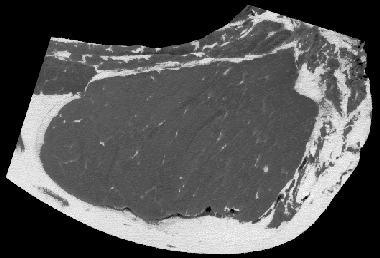

In [3]:
a_pil = Image.open('../data/beef.tif')
a_pil

Primeiro usamos uma operação de fechamento (*closing*, da morfologia matemática) e uma limiarização para obter o bife todo.

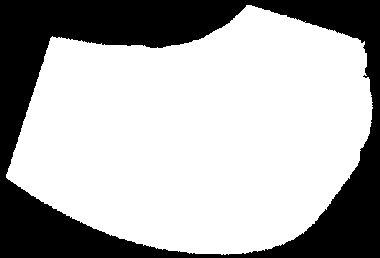

In [4]:
a = np.array(a_pil)
b = mm.closing(a, mm.disk(2))
Image.fromarray(b)
c = (a >= 10)
d = mm.remove_small_holes(c,30)
Image.fromarray(d.astype(np.uint8)*255)

Depois, calculamos o a borda externa do bife, usando a operação de erosão. O resultado da imagem limiarizada menos a sua erosão, nos fornece o marcador externo.

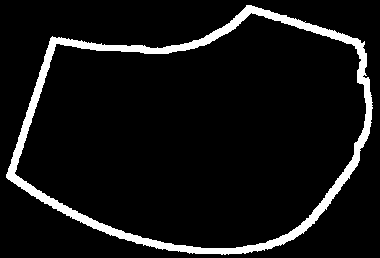

In [5]:
e = np.logical_xor(d,mm.erosion(d, mm.square(13)))
Image.fromarray(e.astype(np.uint8)*255)

Usando ainda o marcador externo e uma operação de erosão com um elemento estruturate bem grande, obtemos o marcador interno (em relação ao objeto que queremos segmentar).

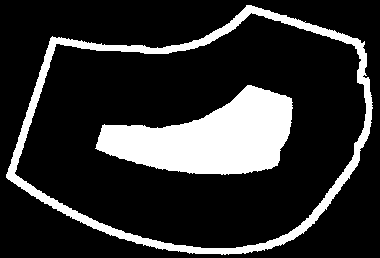

In [6]:
f = mm.erosion(d, mm.diamond(80))
m_int = f.astype(np.uint8)*1
m_ext = e.astype(np.uint8)*2
g = m_int + m_ext
#g = e + f
Image.fromarray(g.astype(np.uint8)*255)

Finalmente, depois de calcularmos os marcadores externo e interno, juntamos os dois em uma única imagem e usamos o watershed para achar a borda do objeto de interesse.

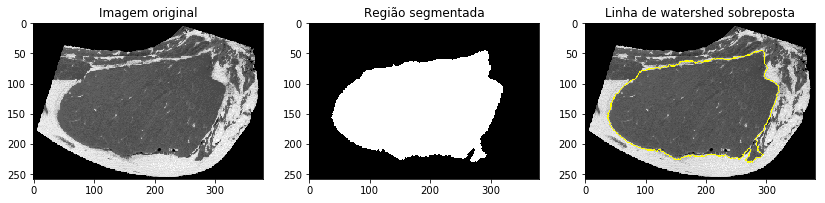

In [7]:
h = b - mm.erosion(b, mm.diamond(3))
markers = g.astype(np.uint8)*255
i = watershed(h,markers)


plt.figure(1, figsize=(14,8))

plt.subplot(1,3,1)
plt.imshow(a, cmap='gray')
plt.title('Imagem original')
plt.subplot(1,3,2)
plt.imshow(i, cmap='gray')
plt.title('Região segmentada')
plt.subplot(1,3,3)
plt.imshow(mark_boundaries(a,i))
plt.title('Linha de watershed sobreposta')

